In [103]:
# -*- coding:utf-8 -*-
from math import log
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

年龄：0代表青年，1代表中年，2代表老年；  
有工作：0代表否，1代表是；  
有自己的房子：0代表否，1代表是；  
信贷情况：0代表一般，1代表好，2代表非常好；  
类别(是否给贷款)：no代表否，yes代表是。


In [104]:
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],  # 数据集
               [0, 0, 0, 1, 'no'],
               [0, 1, 0, 1, 'yes'],
               [0, 1, 1, 0, 'yes'],
               [0, 0, 0, 0, 'no'],
               [1, 0, 0, 0, 'no'],
               [1, 0, 0, 1, 'no'],
               [1, 1, 1, 1, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [2, 0, 1, 2, 'yes'],
               [2, 0, 1, 1, 'yes'],
               [2, 1, 0, 1, 'yes'],
               [2, 1, 0, 2, 'yes'],
               [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']  # 特征标签
    return dataSet, labels

信息熵（经验熵）：当我们处理机器学习问题时，我们通常使用信息熵来衡量数据集的不确定性。  
信息熵值越大，数据集不确定性越高，信息量也就越大；信息熵值越小，数据集不确定性越小；当所有样本都属于同一类别时，经验熵达到最小值（0），表示数据集的不确定性最低。

应用场景：经验熵在决策树算法中常被用于选择最佳的划分特征，通过计算每个特征的经验熵，我们可以评估它们对于目标变量的重要性，选择能够最大程度减少数据集不确定性的特征进行划分。

分类案例: 假设我们有一个分类问题，数据集包含N个样本，每个样本都有一个标签。我们可以根据标签的分布情况计算经验熵。
首先，我们计算每个标签的概率。假设标签有K个不同的取值，我们计算每个标签的频率（即出现的样本数除以总样本数），得到概率分布P。
然后，我们使用经验熵的计算公式来计算熵值：
H(P) = - Σ P(k) * log₂(P(k))
其中，P(k)是第k个标签的概率，Σ表示对所有标签取值进行求和，log₂表示以2为底的对数。

下面是一个简单的案例，展示如何计算经验熵：
假设我们有一个二分类问题的数据集，包含100个样本，其中60个样本属于类别A，40个样本属于类别B。我们可以计算类别A和类别B的概率分布，并计算经验熵。
计算类别A的概率：P(A) = 60 / 100 = 0.6
计算类别B的概率：P(B) = 40 / 100 = 0.4
计算经验熵：H(P) = - (0.6 * log₂(0.6) + 0.4 * log₂(0.4)) ≈ 0.971
在这个案例中，经验熵的值约为0.971，表示数据集的不确定性相对较高。

In [105]:
"""
函数说明:计算给定数据集的经验熵(香农熵) 
H(P) = - Σ P(k) * log₂(P(k))
Parameters:
    dataSet - 数据集
Returns:
    shannonEnt - 经验熵(香农熵)
Modify:
    2020-06-25
"""

def calcShannonEnt(dataSet):
    numEntires = len(dataSet)  # 返回数据集的行数
    labelCounts = {}  # 保存每个标签(Label)出现次数的字典
    for featVec in dataSet:  # 对每组特征向量进行统计
        currentLabel = featVec[-1]  # 提取标签(Label)信息
        if currentLabel not in labelCounts.keys():  # 如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1  # Label计数
    shannonEnt = 0.0  # 经验熵(香农熵)
    for key in labelCounts:  # 计算香农熵
        prob = float(labelCounts[key]) / numEntires  # 选择该标签(Label)的概率
        shannonEnt -= prob * log(prob, 2)  # 利用公式计算
    return shannonEnt

In [106]:
dataSet, features = createDataSet()
print(calcShannonEnt(dataSet))

0.9709505944546686


In [107]:
"""
函数说明:按照给定特征划分数据集的子集
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的某个特征
    value - 需要返回的特征的值
Returns:
    子集中不包含指定的特征值
Modify:
    2020-06-25
"""

def splitDataSet(dataSet, axis, value):
    retDataSet = []  # 创建返回的数据集列表
    for featVec in dataSet:  # 遍历数据集
        if featVec[axis] == value:
            # list[0:5] 列表切片 索引值从0开始 不包含结束索引值
            reducedFeatVec = featVec[:axis]  # 去掉axis特征
            reducedFeatVec.extend(featVec[axis + 1:])  # 将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [108]:
splitDataSet(dataSet, 0, 0)

[[0, 0, 0, 'no'],
 [0, 0, 1, 'no'],
 [1, 0, 1, 'yes'],
 [1, 1, 0, 'yes'],
 [0, 0, 0, 'no']]

输出结果显示:  
[[0, 0, 0, 'no'],  
 [0, 0, 1, 'no'],  
 [1, 0, 1, 'yes'],  
 [1, 1, 0, 'yes'],  
 [0, 0, 0, 'no']]  

In [109]:
"""
函数说明:选择最优特征

Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
Modify:
    2020-06-25
"""

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1  # 特征数量
    baseEntropy = calcShannonEnt(dataSet)  # 计算数据集的信息熵
    bestInfoGain = 0.0  # 信息增益
    bestFeature = -1  # 最优特征的索引值
    for i in range(numFeatures):  # 遍历所有特征
        # 获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)  # 创建set集合{},元素不可重复
        newEntropy = 0.0  # 经验条件熵
        for value in uniqueVals:  # 计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)  # subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))  # 计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)  # 根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy  # 信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))  # 打印每个特征的信息增益
        if (infoGain > bestInfoGain):  # 计算信息增益
            bestInfoGain = infoGain  # 更新信息增益，找到最大的信息增益
            bestFeature = i  # 记录信息增益最大的特征的索引值
    return bestFeature  # 返回信息增益最大的特征的索引值

In [89]:
print(chooseBestFeatureToSplit(dataSet))  # 选择最优特征

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
2


In [90]:
"""
函数说明:创建决策树(这里的决策树就是我们后面的分类模型)

Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
Returns:
    myTree - 决策树
Modify:
    2020-06-25
"""
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]  # 取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):  # 如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1 or len(labels) == 0:  # 遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)  # 选择最优特征
    bestFeatLabel = labels[bestFeat]  # 最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel: {}}  # 根据最优特征的标签生成树
    del (labels[bestFeat])  # 删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet]  # 得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)  # 去掉重复的属性值
    for value in uniqueVals:  # 遍历特征，创建决策树。
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
    return myTree

In [91]:
featLabels = []
myTree = createTree(dataSet, features, featLabels)
print(myTree)

第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


In [114]:
# 以下的代码是数据的可视化操作
"""
函数说明:获取决策树叶子结点的数目

Parameters:
    myTree - 决策树
Returns:
    numLeafs - 决策树的叶子结点的数目
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Modify:
    2020-06-25
"""
def getNumLeafs(myTree):
    numLeafs = 0  # 初始化叶子
    firstStr = next(iter(
        myTree))  # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]  # 获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # 测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

"""
函数说明:获取决策树的层数

Parameters:
    myTree - 决策树
Returns:
    maxDepth - 决策树的层数
Modify:
    2020-06-25
"""

def getTreeDepth(myTree):
    maxDepth = 0  # 初始化决策树深度
    firstStr = next(iter(
        myTree))  # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]  # 获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # 测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth  # 更新层数
    return maxDepth


"""
函数说明:绘制结点

Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
Returns:
    无
Modify:
    2020-06-25
"""

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")  # 定义箭头格式
    font = FontProperties(fname=r"./font/simsun.ttc", size=14)  # 设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',  # 绘制结点
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, fontproperties=font)


"""
函数说明:标注有向边属性值

Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
Returns:
    无
Modify:
    2020-06-25
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]  # 计算标注位置
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


"""
函数说明:绘制决策树
Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
Returns:
    无
Modify:
    2020-06-25
"""

def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")  # 设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")  # 设置叶结点格式
    numLeafs = getNumLeafs(myTree)  # 获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)  # 获取决策树层数
    firstStr = next(iter(myTree))  # 下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)  # 中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)  # 标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)  # 绘制结点
    secondDict = myTree[firstStr]  # 下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD  # y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':  # 测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key], cntrPt, str(key))  # 不是叶结点，递归调用继续绘制
        else:  # 如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

"""
函数说明:创建绘制面板

Parameters:
    inTree - 决策树(字典)
Returns:
    无
Modify:
    2020-06-25
"""

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')  # 创建fig
    fig.clf()  # 清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # 去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))  # 获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))  # 获取决策树层数
    plotTree.xOff = -0.5 / plotTree.totalW;
    plotTree.yOff = 1.0;  # x偏移
    plotTree(inTree, (0.5, 1.0), '')  # 绘制决策树
    plt.show()

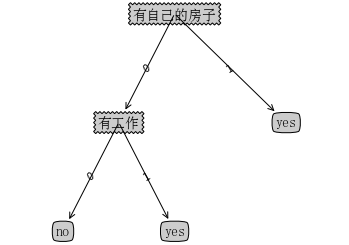

In [115]:
createPlot(myTree)

In [117]:
"""
函数说明:使用决策树分类（根据输入的特征，遍历决策树进行比较，然后输出结果）

Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
Returns:
    classLabel - 分类结果
Modify:
    2020-06-25
"""

def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))  # 获取决策树结点
    secondDict = inputTree[firstStr]  # 下一个字典
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [119]:
# 使用决策树进行分类
testVec = [1, 0]  # 测试数据
result = classify(myTree, featLabels, testVec)
if result == 'yes':
    print("放贷")
if result == 'no':
    print("不放贷")

放贷
